Description
==

## Goal:

**For facial recognition I need data to train on. I'm going to collect missing children to train the software on.**

---

### Resources

- Polly Klaas Foundation - http://www.pollyklaas.org/
```
The Polly Klaas Foundation is a Petaluma, CA, based national nonprofit dedicated to the safety of all children, the recovery of missing children, and public policies that keep children safe in their communities.
```

In [6]:
import requests
import io
from bs4 import BeautifulSoup
from unidecode import unidecode
import pandas as pd
import numpy as np

import psycopg2
import urllib.parse as urlparse
import os
## fast writes
from sqlalchemy import event, create_engine
import psycopg2.extras
import psycopg2.errorcodes

def open_connection():
    connection = psycopg2.connect(
        database=os.environ['RACK_DATABASE'],
        user=os.environ['RACK_USERNAME'],
        password=os.environ['RACK_PASSWORD'],
        host=os.environ['RACK_HOST'],
        port=os.environ['RACK_PORT']
        )
    return connection

In [7]:
POLLY_KLASS_BASE = 'http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page={}'
POLLY_KLASS_BASE

'http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page={}'

In [8]:
url = POLLY_KLASS_BASE.format(1)
r = requests.get(url)
page = BeautifulSoup(r.content)

In [9]:
page_mc = page.find('div', {'class': 'missing-child-resize'})

In [10]:
page_mc.findAll('tbody')[0].find('img')

<img src="http://www.pollyklaas.org/missing/kids/images/a-g/breitrickevelg.jpg"/>

In [11]:
[x.find('img') for x in page_mc.findAll('tbody')]

[<img src="http://www.pollyklaas.org/missing/kids/images/a-g/breitrickevelg.jpg"/>,
 <img src="http://www.pollyklaas.org/missing/kids/images/person-wilsonzyaiaslg.jpg"/>,
 <img src="http://www.pollyklaas.org/missing/kids/images/n-z/oswaltconnerjacklg.jpg"/>,
 <img src="http://www.pollyklaas.org/missing/kids/images/n-z/ryantylee.jpg"/>,
 <img src="http://www.pollyklaas.org/missing/kids/images/n-z/navarroalicialg.jpg"/>,
 <img src="http://www.pollyklaas.org/missing/kids/images/h-m/alexander.png"/>,
 <img src="http://www.pollyklaas.org/missing/kids/images/a-g/dennardserenitylg.jpg"/>,
 <img src="http://www.pollyklaas.org/missing/kids/images/a-g/danzanicholas.jpg"/>,
 <img src="http://www.pollyklaas.org/missing/kids/images/a-g/gusekarlie.jpg"/>,
 <img src="http://www.pollyklaas.org/missing/kids/images/n-z/unbehaun.jpg"/>]

In [131]:
def get_pk_urls():
    missing_children_url = []
    for i in range(1, 15):
        url = POLLY_KLASS_BASE.format(i)
        print(url)
        r = requests.get(url)
        page = (BeautifulSoup(r.content)
                .find('div', {'class': 'missing-child-resize'}))
        missing_children_url.extend([x.find('a').get('href') for x in page.findAll('tbody')])
    return missing_children_url

In [132]:
pk_missing = get_pk_urls()

http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=1
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=2
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=3
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=4
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=5
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=6
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=7
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=8
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=9
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=10
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=11
http://www.pollyklaas.org/missing/index.html?state=&year=&search_name=&page=12
http://www.pollyklaas.org/missing/index.html?state=&year=&sea

In [136]:
len(pk_missing)

135

Get details from a page
==

In [150]:
url = pk_missing[35]
url = 'http://www.pollyklaas.org/missing/kids/amina-al-jailani-layla-al-jailani-sami-al-jailani.html'
# url = 'http://www.pollyklaas.org/missing/kids/benjamin-and-alexander-huante.html'
print(url)
r = requests.get(url)
page = BeautifulSoup(r.content)

http://www.pollyklaas.org/missing/kids/amina-al-jailani-layla-al-jailani-sami-al-jailani.html


In [151]:
page

<!DOCTYPE HTML>
<html>
<head profile="http://www.w3.org/2005/10/profile">
<meta content="Convio CMS" name="generator"/>
<script language="JavaScript" src="/components/cookie/cookie.js" type="text/javascript"></script>
<script language="JavaScript" src="/components/print/printer-friendly.js" type="text/javascript"></script>
<script type="text/javascript">
if (typeof CONVIO=="undefined" || ! CONVIO) { var CONVIO = {}; }
CONVIO.pageUserName = '3381:0';
CONVIO.pageSessionID = 'D384BB3E67644467F2C54E4052C522BC.app30102b';
CONVIO.pageSessionName = 'JSESSIONID';
</script>
<script src="/system/auth/session-status.jsp?nocache=1585429879271" type="text/javascript"></script>
<script type="text/javascript">



// The original referrer may have been lost from the session-status.jsp javascript redirect.
// Read the original referrer from the cookie.
if (typeof CONVIO=="undefined" || ! CONVIO) { var CONVIO = {}; }
CONVIO.referrer = getCookie("CONVIO.referrer");
referrer = "";
if ((CONVIO.referrer ===

In [152]:
if ' and ' in page.find('title').text:
    print('more than one')

In [153]:
page.findAll('tbody')

[<tbody>
 <tr>
 <td style="width: 50%;"> </td>
 <td style="width: 30%; vertical-align: top; text-align: right;"><!-- AddThis Button BEGIN -->
 <div class="addthis_toolbox addthis_default_style">
 <a class="addthis_button_preferred_1"></a>
 <a class="addthis_button_preferred_2"></a>
 <a class="addthis_button_preferred_3"></a>
 <a class="addthis_button_preferred_4"></a>
 <a class="addthis_button_compact"></a>
 <a class="addthis_counter addthis_bubble_style"></a>
 </div>
 <script type="text/javascript">var addthis_config = {"data_track_addressbar":true};</script>
 <script src="//s7.addthis.com/js/300/addthis_widget.js#pubid=ra-4f21bbfa72964677" type="text/javascript"></script>
 <!-- AddThis Button END -->
 </td>
 </tr>
 </tbody>, <tbody>
 <tr>
 <td colspan="2">
 <table border="1" cellpadding="5" width="100%">
 <tbody>
 <tr>
 <td><img src="http://www.pollyklaas.org/images/pdf.gif"/>     To
                   view a printable flyer in Adobe Acrobat Format,
                   <span><a href="

In [154]:
body = page.findAll('tbody')[3]
body.find('span').find('p').text

AttributeError: 'NoneType' object has no attribute 'text'

In [155]:
for body in page.findAll('tbody'):
    body.find('span')

In [156]:
missing_dict = {}
cols = ['Abductor', 'DOB', 'Date Missing', 'Missing From', 
        'CADOB', 'Age at Disappearance', 'Sex', 'Race', 'Height', 
        'Weight', 'Eyes', 'Hair', 'Other', 'Circumstances']
for body in page.findAll('tbody'):
    if None != body.find('span'):
        if 'Missing' in body.find('span').text:
            ## prep to extract
            num = len(body.findAll('p'))
            if num > 1:
                txt = body.findAll('p')[1].text
                name = body.find('span').find('p').text.split('Missing Child: ')[1]
            else:
                txt = body.text
                name = page.find('title').text
            txt = txt.replace('\n', '')
            for i in range(10):
                txt = txt.replace('  ', ' ').strip(' ')
                
            for col in cols:
                txt = txt.replace(col, ' :{}'.format(col))
            txt = txt.strip(' ')

            ## get info about child
            tmp_dict = {'abductor': False}
            keys = txt.split(':')[1:][::2]
            values = [unidecode(x).strip(' ') for x in txt.split(':')[1:][1::2]]
            for i in range(len(keys)):
                tmp_dict.update({keys[i].replace(' ', '_').lower(): values[i]})

            ## update overall dict
            missing_dict.update({name: tmp_dict})
    elif 'Abductor' in body.text:
        ## clean
        txt = unidecode(body.text.replace('\n', ''))
        for i in range(10):
            txt = txt.replace('  ', ' ').strip(' ')
        for col in cols:
            txt = txt.replace(col, ' :{}'.format(col))
        txt = txt.strip(' ')

        ## get info about abuductor
        tmp_dict = {'abductor': True}
        keys = txt.split(':')[1:][::2]
        values = [unidecode(x).strip(' ') for x in txt.split(':')[1:][1::2]]
        for i in range(len(keys)):
            if keys[i] == 'Abductor':
                name = values[i]
            else:
                tmp_dict.update({keys[i].replace(' ', '_').lower(): values[i]})
        missing_dict.update({name: tmp_dict})
            
    
df = pd.DataFrame.from_dict(missing_dict).transpose().reset_index().rename(columns={'index': 'name'})
images = [x.get('src') for x in page.findAll('img', src=True) if 'missing/kids/' in x.get('src')]
df['image'] = images[:len(df)]

In [157]:
tmp_dict

{'abductor': False,
 'date_missing': '06/06/2006',
 'missing_from': 'Kent, OH',
 'dob': '08/31/1998',
 'age_at_disappearance': '7 years old',
 'sex': 'Female',
 'race': 'Biracial',
 'height': '3\'11"',
 'weight': '55 lbs',
 'eyes': 'Brown',
 'hair': 'Brown',
 'other': "Layla's ears are pierced."}

In [113]:
df

,name,abductor,age_at_disappearance,date_missing,dob,eyes,hair,height,missing_from,race,sex,weight,image
0,Emily Huante,True,NaN,NaN,9/15/1982,Brown,Brown,"5'10""",NaN,Caucasian,Female,150,http://www.pollyklaas.org/missing/kids/images/...
1,Benjamin Huante,False,12,8/23/2019,4/28/2007,Brown,Brown,5',"Santa Cruz, CA",Caucasian/Hispanic,Male,100 lbs.,http://www.pollyklaas.org/missing/kids/images/...
2,Alexander Huante,False,7,8/23/2019,10/29/2011,Brown,Brown,4',"Santa Cruz, CA",Caucasian/Hispanic,Male,60 lbs.,http://www.pollyklaas.org/missing/kids/images/...


In [21]:
txt = page.findAll('tbody')[3].findAll('td')[0].text
txt += page.findAll('tbody')[3].findAll('td')[1].text
txt

'Date Missing: February 29, 2020Missing From: Milwaukee, WIDOB: May 22, 2002Age at Disappearance: 17Sex: FemaleRace: African AmericanHeight: 5\'3"Weight: 125 lbs.Eyes: BrownHair: BrownOther:\xa0 Eve wears braces on her teeth and her ears are pierced.\nCircumstances: Eve went missing from Milwaukee, Wisconsin on February 29, 2020.  She may be in the company of an adult male.  She has not been seen or heard from since her disappearance. '

In [23]:
page.findAll('tbody')[5].findAll('td').text

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [27]:
 body.findAll('p')

[<p>Date Missing: February 29, 2020<br/>Missing From: Milwaukee, WI<br/>DOB: May 22, 2002<br/>Age at Disappearance: 17<br/>Sex: Female<br/>Race: African American<br/>Height: 5'3"<br/>Weight: 125 lbs.<br/>Eyes: Brown<br/>Hair: Brown<br/>Other:  Eve wears braces on her teeth and her ears are pierced.</p>]

Get all
==

In [118]:
COLS = ['Abductor', 'DOB', 'Date Missing', 'Missing From', 
        'CADOB', 'Age at Disappearance', 'Sex', 'Race', 'Height', 
        'Weight', 'Eyes', 'Hair', 'Other', 'Circumstances']
def get_missing_deets(url):
    print(url)
    r = requests.get(url)
    page = BeautifulSoup(r.content)
    
    missing_dict = {}
    for body in page.findAll('tbody'):
        if None != body.find('span').find('p'):
            if 'Missing' in body.find('span').find('p').text:
                ## prep to extract
                num = len(body.findAll('p'))
                if num > 1:
                    txt = body.findAll('p')[1].text
                    name = body.find('span').find('p').text.split('Missing Child: ')[1]
                else:
                    txt = body.text
                    name = page.find('title').text
                txt = txt.replace('\n', '')
                for i in range(10):
                    txt = txt.replace('  ', ' ').strip(' ')

                for col in COLS:
                    txt = txt.replace(col, ' :{}'.format(col))
                txt = txt.strip(' ')

                ## get info about child
                tmp_dict = {'abductor': False}
                keys = txt.split(':')[1:][::2]
                values = [unidecode(x).strip(' ') for x in txt.split(':')[1:][1::2]]
                for i in range(len(keys)):
                    tmp_dict.update({keys[i].replace(' ', '_').lower(): values[i]})

                ## update overall dict
                missing_dict.update({name: tmp_dict})
        elif 'Abductor' in body.text:
            ## clean
            txt = unidecode(body.text.replace('\n', ''))
            for i in range(10):
                txt = txt.replace('  ', ' ').strip(' ')
            for col in COLS:
                txt = txt.replace(col, ' :{}'.format(col))
            txt = txt.strip(' ')

            ## get info about abuductor
            tmp_dict = {'abductor': True}
            keys = txt.split(':')[1:][::2]
            values = [unidecode(x).strip(' ') for x in txt.split(':')[1:][1::2]]
            key_len = np.array([len(keys), len(values)]).min()
            for i in range(len(keys)):
                if keys[i] == 'Abductor':
                    name = values[i]
                else:
                    tmp_dict.update({keys[i].replace(' ', '_').lower(): values[i]})
            missing_dict.update({name: tmp_dict})


    df = pd.DataFrame.from_dict(missing_dict).transpose().reset_index().rename(columns={'index': 'name'})
    images = [x.get('src') for x in page.findAll('img', src=True) if 'missing/kids/' in x.get('src')]
    df['image'] = images[:len(df)]
    
    return df

In [138]:
url = pk_missing[30]
df = get_missing_deets(url)
df

http://www.pollyklaas.org/missing/kids/paige-moore.html


AttributeError: 'NoneType' object has no attribute 'find'

In [161]:
not_work = []
overall_df = pd.DataFrame()
for url in pk_missing:
    try:
        tmp = get_missing_deets(url)
        overall_df = overall_df.append(tmp).reset_index(drop=True)
    except:
        not_work.append(url)
        print('{} did not work'.format(url))

http://www.pollyklaas.org/missing/kids/eve-breitrick.html
http://www.pollyklaas.org/missing/kids/zyaisa-person-wilson.html
http://www.pollyklaas.org/missing/kids/connerjack-oswalt.html
http://www.pollyklaas.org/missing/kids/joshua-vallow-and-tylee-ryan.html
http://www.pollyklaas.org/missing/kids/alicia-navarro.html
http://www.pollyklaas.org/missing/kids/benjamin-and-alexander-huante.html
http://www.pollyklaas.org/missing/kids/serenity-dennard.html
http://www.pollyklaas.org/missing/kids/nicholas-danza.html
http://www.pollyklaas.org/missing/kids/karlie-guse.html
http://www.pollyklaas.org/missing/kids/kayla-unbehaun.html
http://www.pollyklaas.org/missing/kids/marissa-escareno.html
http://www.pollyklaas.org/missing/kids/faith-king-basey.html
http://www.pollyklaas.org/missing/kids/elijah-moore.html
http://www.pollyklaas.org/missing/kids/enrique-rios.html
http://www.pollyklaas.org/missing/kids/lashaya-stine.html
http://www.pollyklaas.org/missing/kids/images/a-g/adinda-curry.html
http://www.p

http://www.pollyklaas.org/missing/kids/agueda-arias.html did not work
http://www.pollyklaas.org/missing/kids/page-27044075.html
http://www.pollyklaas.org/missing/kids/page-27044075.html did not work
http://www.pollyklaas.org/missing/kids/abby-jo-blagg.html
http://www.pollyklaas.org/missing/kids/abby-jo-blagg.html did not work
http://www.pollyklaas.org/missing/kids/page-27044130.html
http://www.pollyklaas.org/missing/kids/page-27044130.html did not work
http://www.pollyklaas.org/missing/kids/jacqueline-vasquez.html
http://www.pollyklaas.org/missing/kids/jacqueline-vasquez.html did not work
http://www.pollyklaas.org/missing/kids/page-27044144.html
http://www.pollyklaas.org/missing/kids/page-27044144.html did not work
http://www.pollyklaas.org/missing/kids/veronica-martinez.html
http://www.pollyklaas.org/missing/kids/veronica-martinez.html did not work
http://www.pollyklaas.org/missing/kids/bethany-leanne-markowski.html
http://www.pollyklaas.org/missing/kids/bethany-leanne-markowski.html 

In [162]:
overall_df

,abductor,age_at_disappearance,circumstances,date_missing,dob,eyes,hair,height,image,missing_from,name,other,race,sex,south_elgin_police_department_-_(630)_232-4739_or_the_polly_klaas(r)_foundation_(800)_587-4357_missing_child_information,weight
0,False,17,"Eve went missing from Milwaukee, Wisconsin on ...","February 29, 2020","May 22, 2002",Brown,Brown,"5'3""",http://www.pollyklaas.org/missing/kids/breitri...,"Milwaukee, WI",Eve Breitrick,Eve wears braces on her teeth and her ears are...,African American,Female,NaN,125 lbs.
1,False,17,"Zyasia went missing from Richmond, California ...","November 18, 2019","September 6, 2002",Brown,Black,"5'1""",http://www.pollyklaas.org/missing/kids/person-...,"Richmond, CA",Zyasia Peterson-Wilson,Zyasia's ears are pieced.,African American,Female,NaN,121 lbs.
2,False,17,"Connerjack went missing from Clearlake, Califo...","September 28, 2019","May 25, 2002",Hazel,Dirty Blonde,"6'3""",http://www.pollyklaas.org/missing/kids/oswaltc...,"Clearlake, CA",Connerjack Oswalt,Connerjack was last seen wearing a white shirt...,Caucasian,Male,NaN,125 lbs.
3,False,7,NaN,9/23/2019,5/25/2012,Brown,Brown,"4'0""",http://www.pollyklaas.org/missing/kids/images/...,"Rexburg, ID",Joshua Valllow,NaN,Caucasian,Male,NaN,50 lbs.
4,False,17,NaN,9/23/2019,9/24/2002,Blue,Blonde,"5'0""",http://www.pollyklaas.org/missing/kids/images/...,"Rexburg, ID",Tylee Ryan,NaN,Caucasian,Female,NaN,160
5,False,15,"Alicia went missing from Glendale, Arizona on ...","September 15, 2019","september 20, 2004",Brown,Black,"4'5""",http://www.pollyklaas.org/missing/kids/navarro...,"Glendale, AZ",Alicia Navarro,Alicia wears braces on her teeth.,Hispanic,Female,NaN,95 lbs.
6,True,NaN,NaN,NaN,9/15/1982,Brown,Brown,"5'10""",http://www.pollyklaas.org/missing/kids/images/...,NaN,Emily Huante,NaN,Caucasian,Female,NaN,150
7,False,12,NaN,8/23/2019,4/28/2007,Brown,Brown,5',http://www.pollyklaas.org/missing/kids/images/...,"Santa Cruz, CA",Benjamin Huante,NaN,Caucasian/Hispanic,Male,NaN,100 lbs.
8,False,7,NaN,8/23/2019,10/29/2011,Brown,Brown,4',http://www.pollyklaas.org/missing/kids/images/...,"Santa Cruz, CA",Alexander Huante,NaN,Caucasian/Hispanic,Male,NaN,60 lbs.
9,False,9,"Serenity went missing from Rapid City, South D...","February 3, 2019","May 12, 2009",Blue,Blonde,"4'7""",http://www.pollyklaas.org/missing/kids/dennard...,"Rapid City, SD",Serenity Dennard,Both pictures shown are of Serenity.,Caucasian,Female,NaN,96 lbs.


In [163]:
not_work

['http://www.pollyklaas.org/missing/kids/macin-smith.html',
 'http://www.pollyklaas.org/missing/kids/king-walker.html',
 'http://www.pollyklaas.org/missing/kids/molly-miller.html',
 'http://www.pollyklaas.org/missing/kids/stephanie-chavez.html',
 'http://www.pollyklaas.org/missing/kids/raymond-dampier-jr.html',
 'http://www.pollyklaas.org/missing/kids/paige-moore.html',
 'http://www.pollyklaas.org/missing/kids/caleigh-harrison.html',
 'http://www.pollyklaas.org/missing/kids/sierra-lamar.html',
 'http://www.pollyklaas.org/missing/kids/ayla-reynolds.html',
 'http://www.pollyklaas.org/missing/kids/jahessye-shockley.html',
 'http://www.pollyklaas.org/missing/kids/karissa-alline-schell.html',
 'http://www.pollyklaas.org/missing/kids/enrique-medel.html',
 'http://www.pollyklaas.org/missing/kids/alexander-skelton-andrew-skelton-tanner-skelton.html',
 'http://www.pollyklaas.org/missing/kids/andonios-petroutsas.html',
 'http://www.pollyklaas.org/missing/kids/alexandria-lowitzer.html',
 'http://

Push to Datbase
==

In [165]:
overall_df.loc[overall_df['abductor'] == True]

,abductor,age_at_disappearance,circumstances,date_missing,dob,eyes,hair,height,image,missing_from,name,other,race,sex,south_elgin_police_department_-_(630)_232-4739_or_the_polly_klaas(r)_foundation_(800)_587-4357_missing_child_information,weight
6,True,NaN,NaN,NaN,9/15/1982,Brown,Brown,"5'10""",http://www.pollyklaas.org/missing/kids/images/...,NaN,Emily Huante,NaN,Caucasian,Female,NaN,150
12,True,9,"Kayla was allegedly abducted by her mother, He...",7/5/2017,6/15/1982,Blue,Dark Blonde,"5'3""",http://www.pollyklaas.org/missing/kids/images/...,"South Elgin, IL",Heather Unbehaun,Non-Custodial Mother,Caucasian,Female,,135


In [167]:
overall_df.loc[overall_df['abductor'] == False]

,abductor,age_at_disappearance,circumstances,date_missing,dob,eyes,hair,height,image,missing_from,name,other,race,sex,south_elgin_police_department_-_(630)_232-4739_or_the_polly_klaas(r)_foundation_(800)_587-4357_missing_child_information,weight
0,False,17,"Eve went missing from Milwaukee, Wisconsin on ...","February 29, 2020","May 22, 2002",Brown,Brown,"5'3""",http://www.pollyklaas.org/missing/kids/breitri...,"Milwaukee, WI",Eve Breitrick,Eve wears braces on her teeth and her ears are...,African American,Female,NaN,125 lbs.
1,False,17,"Zyasia went missing from Richmond, California ...","November 18, 2019","September 6, 2002",Brown,Black,"5'1""",http://www.pollyklaas.org/missing/kids/person-...,"Richmond, CA",Zyasia Peterson-Wilson,Zyasia's ears are pieced.,African American,Female,NaN,121 lbs.
2,False,17,"Connerjack went missing from Clearlake, Califo...","September 28, 2019","May 25, 2002",Hazel,Dirty Blonde,"6'3""",http://www.pollyklaas.org/missing/kids/oswaltc...,"Clearlake, CA",Connerjack Oswalt,Connerjack was last seen wearing a white shirt...,Caucasian,Male,NaN,125 lbs.
3,False,7,NaN,9/23/2019,5/25/2012,Brown,Brown,"4'0""",http://www.pollyklaas.org/missing/kids/images/...,"Rexburg, ID",Joshua Valllow,NaN,Caucasian,Male,NaN,50 lbs.
4,False,17,NaN,9/23/2019,9/24/2002,Blue,Blonde,"5'0""",http://www.pollyklaas.org/missing/kids/images/...,"Rexburg, ID",Tylee Ryan,NaN,Caucasian,Female,NaN,160
5,False,15,"Alicia went missing from Glendale, Arizona on ...","September 15, 2019","september 20, 2004",Brown,Black,"4'5""",http://www.pollyklaas.org/missing/kids/navarro...,"Glendale, AZ",Alicia Navarro,Alicia wears braces on her teeth.,Hispanic,Female,NaN,95 lbs.
7,False,12,NaN,8/23/2019,4/28/2007,Brown,Brown,5',http://www.pollyklaas.org/missing/kids/images/...,"Santa Cruz, CA",Benjamin Huante,NaN,Caucasian/Hispanic,Male,NaN,100 lbs.
8,False,7,NaN,8/23/2019,10/29/2011,Brown,Brown,4',http://www.pollyklaas.org/missing/kids/images/...,"Santa Cruz, CA",Alexander Huante,NaN,Caucasian/Hispanic,Male,NaN,60 lbs.
9,False,9,"Serenity went missing from Rapid City, South D...","February 3, 2019","May 12, 2009",Blue,Blonde,"4'7""",http://www.pollyklaas.org/missing/kids/dennard...,"Rapid City, SD",Serenity Dennard,Both pictures shown are of Serenity.,Caucasian,Female,NaN,96 lbs.
10,False,16,"Nicholas went missing from St. James, New York...","January 30, 2019",3/20/2002,Brown,Brown,"5'9""",http://www.pollyklaas.org/missing/kids/images/...,"St. James, NY",Nicholas Danza,May be in the company of a female juvenile.,Caucasian,Male,NaN,130


In [232]:
cols = ['name', 'dob', 'date_missing', 'eyes', 'hair', 'height',
        'weight', 'race', 'sex', 'missing_from', 'age_at_disappearance',
        'circumstances', 'other'
       ]
victim_df = overall_df.loc[overall_df['abductor'] == False, cols].copy()
victim_df['dob'] = pd.to_datetime(victim_df['dob'])
victim_df['date_missing'] = pd.to_datetime(victim_df['date_missing'])
victim_df['weight'] = victim_df['weight'].apply(lambda row: int(row.split(' ')[0].split('-')[0]))
victim_df['city'] = victim_df['missing_from'].apply(lambda row: row.split(', ')[0])
victim_df['state'] = victim_df['missing_from'].apply(lambda row: row.split(', ')[1])
victim_df = victim_df.drop(['missing_from'], 1)
victim_df['country'] = 'USA'

## edge case
victim_df.loc[23, 'age_at_disappearance'] = 1

for col in victim_df.columns:
    victim_df.loc[victim_df[col] == '', col] = None

victim_df

/usr/local/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,name,dob,date_missing,eyes,hair,height,weight,race,sex,age_at_disappearance,circumstances,other,city,state,country
0,Eve Breitrick,2002-05-22,2020-02-29,Brown,Brown,"5'3""",125.0,African American,Female,17,"Eve went missing from Milwaukee, Wisconsin on ...",Eve wears braces on her teeth and her ears are...,Milwaukee,WI,USA
1,Zyasia Peterson-Wilson,2002-09-06,2019-11-18,Brown,Black,"5'1""",121.0,African American,Female,17,"Zyasia went missing from Richmond, California ...",Zyasia's ears are pieced.,Richmond,CA,USA
2,Connerjack Oswalt,2002-05-25,2019-09-28,Hazel,Dirty Blonde,"6'3""",125.0,Caucasian,Male,17,"Connerjack went missing from Clearlake, Califo...",Connerjack was last seen wearing a white shirt...,Clearlake,CA,USA
3,Joshua Valllow,2012-05-25,2019-09-23,Brown,Brown,"4'0""",50.0,Caucasian,Male,7,NaN,NaN,Rexburg,ID,USA
4,Tylee Ryan,2002-09-24,2019-09-23,Blue,Blonde,"5'0""",160.0,Caucasian,Female,17,NaN,NaN,Rexburg,ID,USA
5,Alicia Navarro,2004-09-20,2019-09-15,Brown,Black,"4'5""",95.0,Hispanic,Female,15,"Alicia went missing from Glendale, Arizona on ...",Alicia wears braces on her teeth.,Glendale,AZ,USA
7,Benjamin Huante,2007-04-28,2019-08-23,Brown,Brown,5',100.0,Caucasian/Hispanic,Male,12,NaN,NaN,Santa Cruz,CA,USA
8,Alexander Huante,2011-10-29,2019-08-23,Brown,Brown,4',60.0,Caucasian/Hispanic,Male,7,NaN,NaN,Santa Cruz,CA,USA
9,Serenity Dennard,2009-05-12,2019-02-03,Blue,Blonde,"4'7""",96.0,Caucasian,Female,9,"Serenity went missing from Rapid City, South D...",Both pictures shown are of Serenity.,Rapid City,SD,USA
10,Nicholas Danza,2002-03-20,2019-01-30,Brown,Brown,"5'9""",130.0,Caucasian,Male,16,"Nicholas went missing from St. James, New York...",May be in the company of a female juvenile.,St. James,NY,USA


```
ALTER TABLE victims ADD COLUMN name varchar(50);
ALTER TABLE victims ADD COLUMN dob date;
ALTER TABLE victims ADD COLUMN date_missing date;
ALTER TABLE victims ADD COLUMN eyes varchar(25);
ALTER TABLE victims ADD COLUMN hair varchar(25);
ALTER TABLE victims ADD COLUMN height varchar(10);
ALTER TABLE victims ADD COLUMN weight int;
ALTER TABLE victims ADD COLUMN race varchar(50);
ALTER TABLE victims ADD COLUMN sex varchar(10);
ALTER TABLE victims ADD COLUMN age_at_disappearance int;
ALTER TABLE victims ADD COLUMN circumstances TEXT;
ALTER TABLE victims ADD COLUMN other TEXT;
ALTER TABLE victims ADD COLUMN city varchar(25);
ALTER TABLE victims ADD COLUMN state varchar(25);
ALTER TABLE victims ADD COLUMN country varchar(15);

ALTER TABLE victims ADD CONSTRAINT constraintname UNIQUE (columns);

CREATE UNIQUE INDEX victims_unique ON victims (name, dob, date_missing);
```

In [205]:
engine = create_engine('postgresql://{}:{}@{}/{}'.format(os.environ['RACK_USERNAME'],
                                                            os.environ['RACK_PASSWORD'],
                                                            os.environ['RACK_HOST'],
                                                            os.environ['RACK_DATABASE']
                                                           ))

In [233]:
cols = ['name', 'dob', 'date_missing', 'eyes', 'hair', 'height',
        'weight', 'race', 'sex', 'missing_from', 'age_at_disappearance',
        'circumstances', 'other'
       ]
victim_df = overall_df.loc[overall_df['abductor'] == False, cols].copy()
victim_df['dob'] = pd.to_datetime(victim_df['dob'])
victim_df['date_missing'] = pd.to_datetime(victim_df['date_missing'])
victim_df['weight'] = victim_df['weight'].apply(lambda row: int(row.split(' ')[0].split('-')[0]))
victim_df['city'] = victim_df['missing_from'].apply(lambda row: row.split(', ')[0])
victim_df['state'] = victim_df['missing_from'].apply(lambda row: row.split(', ')[1])
victim_df = victim_df.drop(['missing_from'], 1)
victim_df['country'] = 'USA'

## edge case
victim_df.loc[23, 'age_at_disappearance'] = 1

for col in victim_df.columns:
    victim_df.loc[victim_df[col] == '', col] = None
    
    
victim_df.to_sql('victims', con=engine, if_exists='append', index=False)

Table for Photos
==

```
CREATE TABLE victim_photo (
    id integer,
    url TEXT
);
CREATE INDEX victim_photo_id ON victim_photo (id);
```

In [248]:
victim_with_id = pd.read_sql_query("select name, id from victims", open_connection())
victim_with_id = (victim_with_id
                  .merge(overall_df[['name', 'image']], how='left', on='name')
                  .rename(columns={'image': 'url'}).drop('name', 1))
victim_with_id

,id,url
0,35,http://www.pollyklaas.org/missing/kids/breitri...
1,36,http://www.pollyklaas.org/missing/kids/person-...
2,37,http://www.pollyklaas.org/missing/kids/oswaltc...
3,38,http://www.pollyklaas.org/missing/kids/images/...
4,39,http://www.pollyklaas.org/missing/kids/images/...
5,40,http://www.pollyklaas.org/missing/kids/navarro...
6,41,http://www.pollyklaas.org/missing/kids/images/...
7,42,http://www.pollyklaas.org/missing/kids/images/...
8,43,http://www.pollyklaas.org/missing/kids/dennard...
9,44,http://www.pollyklaas.org/missing/kids/images/...


In [249]:
victim_with_id.to_sql('victim_photo', con=engine, if_exists='append', index=False)

Store Photos to S3
==

In [270]:
import requests
import io
from bs4 import BeautifulSoup
import PIL.Image

In [276]:
# def persist_image(folder_path, url):
def persist_image(url, id_):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = PIL.Image.open(image_file).convert('RGB')
        file_name = url.split('/')[-1].split('.')[0]
        
        ## create directory
        directory = '../data/victim/{}'.format(id_)
        if not os.path.exists(directory):
            os.makedirs(directory)
        
        file_path = '{}/{}.jpg'.format(directory, file_name)
        print(file_path)
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [277]:
url = victim_with_id.loc[0, 'url']
id_ = victim_with_id.loc[0, 'id']
persist_image(url, id_)

../data/victim/35/breitrickevelg.jpg
SUCCESS - saved http://www.pollyklaas.org/missing/kids/breitrickevelg.jpg - as ../data/victim/35/breitrickevelg.jpg


In [278]:
for i in victim_with_id.index:
    url = victim_with_id.loc[i, 'url']
    id_ = victim_with_id.loc[i, 'id']
    persist_image(url, id_)

../data/victim/35/breitrickevelg.jpg
SUCCESS - saved http://www.pollyklaas.org/missing/kids/breitrickevelg.jpg - as ../data/victim/35/breitrickevelg.jpg
../data/victim/36/person-wilsonzyaiaslg.jpg
SUCCESS - saved http://www.pollyklaas.org/missing/kids/person-wilsonzyaiaslg.jpg - as ../data/victim/36/person-wilsonzyaiaslg.jpg
../data/victim/37/oswaltconnerjacklg.jpg
SUCCESS - saved http://www.pollyklaas.org/missing/kids/oswaltconnerjacklg.jpg - as ../data/victim/37/oswaltconnerjacklg.jpg
../data/victim/38/vallow.jpg
SUCCESS - saved http://www.pollyklaas.org/missing/kids/images/n-z/vallow.jpg - as ../data/victim/38/vallow.jpg
../data/victim/39/ryantylee.jpg
SUCCESS - saved http://www.pollyklaas.org/missing/kids/images/n-z/ryantylee.jpg - as ../data/victim/39/ryantylee.jpg
../data/victim/40/navarroalicialg.jpg
SUCCESS - saved http://www.pollyklaas.org/missing/kids/navarroalicialg.jpg - as ../data/victim/40/navarroalicialg.jpg
../data/victim/41/alexander.jpg
SUCCESS - saved http://www.poll

In [331]:
import boto3
import os
s3 = boto3.resource('s3', region_name='us-east-1')
bucket = s3.Bucket('victims')

In [ ]:
path_write = '{}/{}.jpg'.format(id_, file_name)
print(path_read)
print('writing for {}'.format(path_write))
bucket.upload_file(path_read, path_write)

In [341]:
for i in victim_with_id.index:
    url = victim_with_id.loc[i, 'url']
    file_name = url.split('/')[-1].split('.')[0]
    id_ = victim_with_id.loc[i, 'id']

    path_read = '../data/victim/{}/{}.jpg'.format(id_, file_name)
    image_content = requests.get(url).content
    image_file = io.BytesIO(image_content)
    PIL.Image.open(image_file).convert('RGB')
    image = PIL.Image.open(image_file).convert('RGB')


    path_write = '{}/{}.jpg'.format(id_, file_name)
    print(path_read, path_write)
    print('writing for {}'.format(path_write))
    bucket.upload_file(path_read, path_write)

../data/victim/35/breitrickevelg.jpg 35/breitrickevelg.jpg
writing for 35/breitrickevelg.jpg
../data/victim/36/person-wilsonzyaiaslg.jpg 36/person-wilsonzyaiaslg.jpg
writing for 36/person-wilsonzyaiaslg.jpg
../data/victim/37/oswaltconnerjacklg.jpg 37/oswaltconnerjacklg.jpg
writing for 37/oswaltconnerjacklg.jpg
../data/victim/38/vallow.jpg 38/vallow.jpg
writing for 38/vallow.jpg
../data/victim/39/ryantylee.jpg 39/ryantylee.jpg
writing for 39/ryantylee.jpg
../data/victim/40/navarroalicialg.jpg 40/navarroalicialg.jpg
writing for 40/navarroalicialg.jpg
../data/victim/41/alexander.jpg 41/alexander.jpg
writing for 41/alexander.jpg
../data/victim/42/emily.jpg 42/emily.jpg
writing for 42/emily.jpg
../data/victim/43/dennardserenitylg.jpg 43/dennardserenitylg.jpg
writing for 43/dennardserenitylg.jpg
../data/victim/44/danzanick.jpg 44/danzanick.jpg
writing for 44/danzanick.jpg
../data/victim/45/gusekarlie.jpg 45/gusekarlie.jpg
writing for 45/gusekarlie.jpg
../data/victim/46/unbehaunheather.jpg 46

Add sinlge image for jeffery epstein
==

```
CREATE TABLE perpetrator_photo (
    id integer,
    url TEXT
);
CREATE INDEX perpetrator_photo_id ON perpetrator_photo (id);
```

In [407]:
import pickle
import pickle
import boto3
import json
import cv2
import numpy as np
import cv2
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import psycopg2
import urllib.parse as urlparse
import os
## fast writes
from sqlalchemy import event, create_engine
import psycopg2.extras
import psycopg2.errorcodes

def open_connection():
    connection = psycopg2.connect(
        database=os.environ['RACK_DATABASE'],
        user=os.environ['RACK_USERNAME'],
        password=os.environ['RACK_PASSWORD'],
        host=os.environ['RACK_HOST'],
        port=os.environ['RACK_PORT']
        )
    return connection

engine = create_engine('postgresql://{}:{}@{}/{}'.format(os.environ['RACK_USERNAME'],
                                                            os.environ['RACK_PASSWORD'],
                                                            os.environ['RACK_HOST'],
                                                            os.environ['RACK_DATABASE']
                                                           ))

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def get_gray(faces, image, gray):
    for (x,y,w,h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        image_gray = gray[y:y+h, x:x+w]
    return image_gray

def get_single_face(gray):
    for i in range(25):
        faces = haar_cascade_face.detectMultiScale(gray, 1.1, i)
        if len(faces) == 1:
            return faces, True
        elif len(faces) == 0:
            return [], False
    return [], False

In [360]:
engine = create_engine('postgresql://{}:{}@{}/{}'.format(os.environ['RACK_USERNAME'],
                                                            os.environ['RACK_PASSWORD'],
                                                            os.environ['RACK_HOST'],
                                                            os.environ['RACK_DATABASE']
                                                           ))

In [353]:
perp_df = pd.DataFrame(['Jeffrey Epstein', 'USA'], index=['name', 'country']).transpose()
perp_df

,name,country
0,Jeffrey Epstein,USA


In [354]:
perp_df.to_sql('perpetrators', con=engine, if_exists='append', index=False)

In [355]:
url = 'https://www.thesun.co.uk/wp-content/uploads/2019/07/NINTCHDBPICT000141454388-e1562596411460.jpg'

In [379]:
perpetrators_with_id = pd.read_sql_query("select id from perpetrators", open_connection())
perpetrators_with_id['url'] = url
perpetrators_with_id

,id,url
0,1,https://www.thesun.co.uk/wp-content/uploads/20...


In [405]:
def get_vector(id_, table):
    ## get victim image
    sql_ = """
    SELECT url 
    FROM {}
    WHERE id = {}
    """.format(table, id_)
    url = pd.read_sql_query(sql_, open_connection()).loc[0, 'url']
    file_name = url.split('/')[-1].split('.')[0]
    path = '/Users/Alexanderhubbard/Downloads/j-epstein.jpg'
    image = cv2.imread(path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces, found = get_single_face(gray)
    if found:
        return get_gray(faces, image, gray)
    else:
        return None

In [408]:
test = get_vector(1, 'perpetrator_photo')

In [409]:
test

array([[ 36,  46,  54, ..., 147, 148, 148],
       [ 37,  48,  56, ..., 147, 148, 148],
       [ 38,  49,  57, ..., 147, 148, 149],
       ...,
       [138, 139, 139, ..., 140, 141, 142],
       [139, 139, 139, ..., 141, 142, 144],
       [139, 139, 139, ..., 141, 142, 143]], dtype=uint8)

In [412]:
perpetrators_with_id['face_vector'] = str(pickle.dumps(test))
perpetrators_with_id

,id,url,face_vector
0,1,https://www.thesun.co.uk/wp-content/uploads/20...,b'\x80\x03cnumpy.core.multiarray\n_reconstruct...


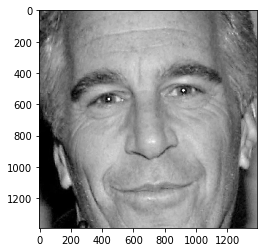

In [410]:
plt.imshow(convertToRGB(test))

In [416]:
perpetrators_with_id.to_sql('perpetrator_photo', con=engine, if_exists='append', index=False)

In [417]:
tmp = pd.read_sql_query("select * from perpetrator_photo", open_connection())
tmp['face_vector'] = tmp['face_vector'].apply(lambda row: pickle.loads(eval(row)))
tmp = tmp.loc[tmp['face_vector'].notnull()]
tmp.tail()

,id,url,face_vector
0,1,https://www.thesun.co.uk/wp-content/uploads/20...,"[[36, 46, 54, 55, 53, 52, 54, 54, 56, 56, 57, ..."


Put Perp to s3
==

In [365]:
perpetrators_with_id = pd.read_sql_query('select * from perpetrator_photo limit 1;', open_connection())
perpetrators_with_id

,id,url
0,1,https://www.thesun.co.uk/wp-content/uploads/20...


In [375]:
import boto3
import os
s3 = boto3.resource('s3', region_name='us-east-1')
bucket_perpetrators = s3.Bucket('perpetrators')

In [376]:
for i in perpetrators_with_id.index:
    url = perpetrators_with_id.loc[i, 'url']
    file_name = url.split('/')[-1].split('.')[0]
    id_ = perpetrators_with_id.loc[i, 'id']

    path_read = '/Users/Alexanderhubbard/Downloads/j-epstein.jpg'
    image_content = requests.get(url).content
    image_file = io.BytesIO(image_content)
    PIL.Image.open(image_file).convert('RGB')
    image = PIL.Image.open(image_file).convert('RGB')


    path_write = '{}/{}.jpg'.format(id_, file_name)
    print(path_read, path_write)
    print('writing for {}'.format(path_write))
    bucket_perpetrators.upload_file(path_read, path_write)

/Users/Alexanderhubbard/Downloads/j-epstein.jpg 1/NINTCHDBPICT000141454388-e1562596411460.jpg
writing for 1/NINTCHDBPICT000141454388-e1562596411460.jpg
